In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage
import sys


In [2]:
voltajes= [0.016,0.018,0.020,0.022,0.024,0.026,0.028,0.030,0.035,0.040,0.045,0]
print(voltajes)

[0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.035, 0.04, 0.045, 0]


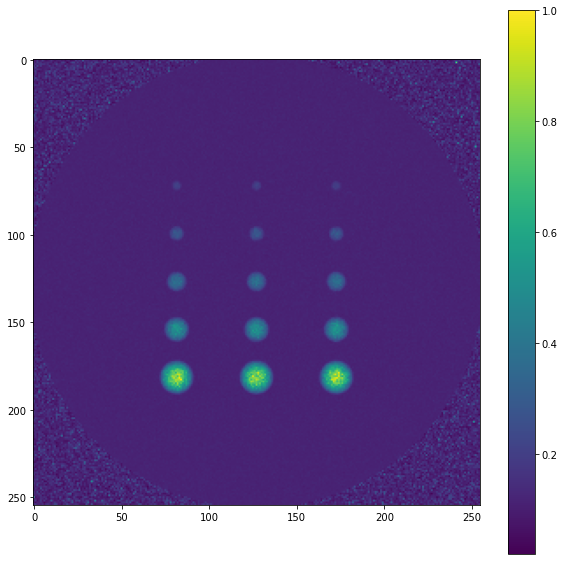

In [5]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0]
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-0-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]

imagen_GATE_dosisCorregida= imagen_GATE_dosisBase/imagen_GATE_dosis
imagen_GATE_dosisCorregida= imagen_GATE_dosisCorregida/np.max(imagen_GATE_dosisCorregida)

fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosisCorregida,cmap='viridis')
plt.colorbar()

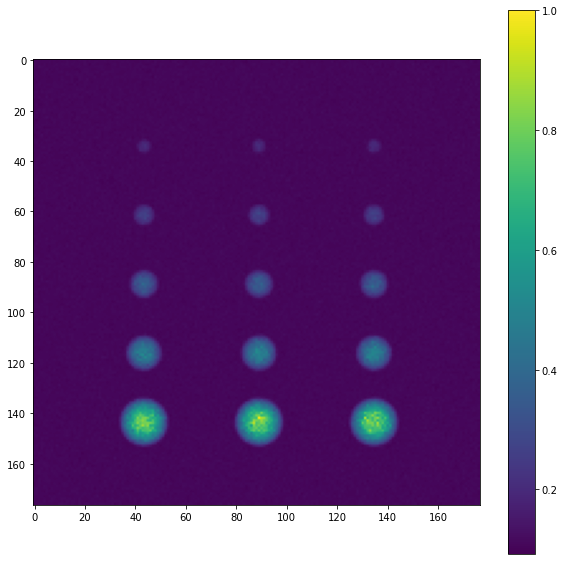

In [4]:
#Separar la parte de adentro del ciruclo
fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosisCorregida[38:215, 38:215],cmap='viridis')
plt.colorbar()

In [3]:
def sacar_CNRs1(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 55]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[0:55,:]
        
        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs2(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 77 ]
    df2 =df2[df2["y"] > 38 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
       
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[38:77,:]
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs3(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 107]
    df2 =df2[df2["y"] > 66 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[66:107,:]
        
        if (k==0):
            i_index,j_index=(np.where(region_of_interest>0.14))
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs4(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 132 ]
    df2 =df2[df2["y"] > 97 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[97:132,:]
        
        if (k==0):
            i_index,j_index=(np.where(region_of_interest>0.14))
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs5(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 179 ]
    df2 =df2[df2["y"] > 124 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[124:179,:]
        
        if (k==0):
            i_index,j_index=(np.where(region_of_interest>0.14))
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRsG(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[:,:]
        
        if (k==0):
            i_index,j_index=(np.where(region_of_interest>0.14))
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

# CNR =$\frac{|S_{A}-S_{B}|}{\sigma_{o}}$

where $S_{A}$ and $S_{B}$ are signal intensities for signal producing structures A and B in the region of interest and $\sigma_{o}$ is the standard deviation of the background image noise.

In [4]:
VoltajesCorre= [16,18,20,22,24,26,28,30,35,40,45]
#print(len(VoltajesCorre))
CNR1s= sacar_CNRs1(VoltajesCorre)
CNR2s= sacar_CNRs2(VoltajesCorre)
CNR3s= sacar_CNRs3(VoltajesCorre)
CNR4s= sacar_CNRs4(VoltajesCorre)
CNR5s= sacar_CNRs5(VoltajesCorre)
CNRGene= sacar_CNRsG(VoltajesCorre)

In [6]:
CNRS0 = CNR1s, CNR2s, CNR3s, CNR4s, CNR5s
CNRS0  = np.array(CNRS0).T
df = pd.DataFrame(CNRS0, columns = ['CNR1s','CNR2s', 'CNR3s', 'CNR4s', 'CNR5s'])
display(df)
df.to_csv('CNRS80',index=False)

,CNR1s,CNR2s,CNR3s,CNR4s,CNR5s
0,7.105412,9.638995,11.489673,12.856761,14.862538
1,8.426827,11.783391,14.265472,16.261761,19.862141
2,8.643668,12.360669,15.132814,17.707445,21.795479
3,8.041323,11.629540,15.042270,17.595957,22.089165
4,7.400895,10.713190,13.657667,16.668863,20.779079
5,6.705533,9.609627,12.537112,15.336909,19.149036
6,6.013920,8.955711,11.372706,13.882172,17.967106
7,5.559746,7.880297,10.368267,12.322455,16.156313
8,4.218941,6.238893,7.971723,9.690948,12.737159
9,3.281121,5.039455,6.538351,7.868367,10.239904


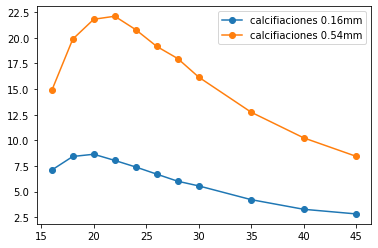

In [9]:
plt.plot(VoltajesCorre,CNR1s, 'o-', label='calcifiaciones 0.16mm')
plt.plot(VoltajesCorre,CNR5s, 'o-', label='calcifiaciones 0.54mm')
plt.legend()

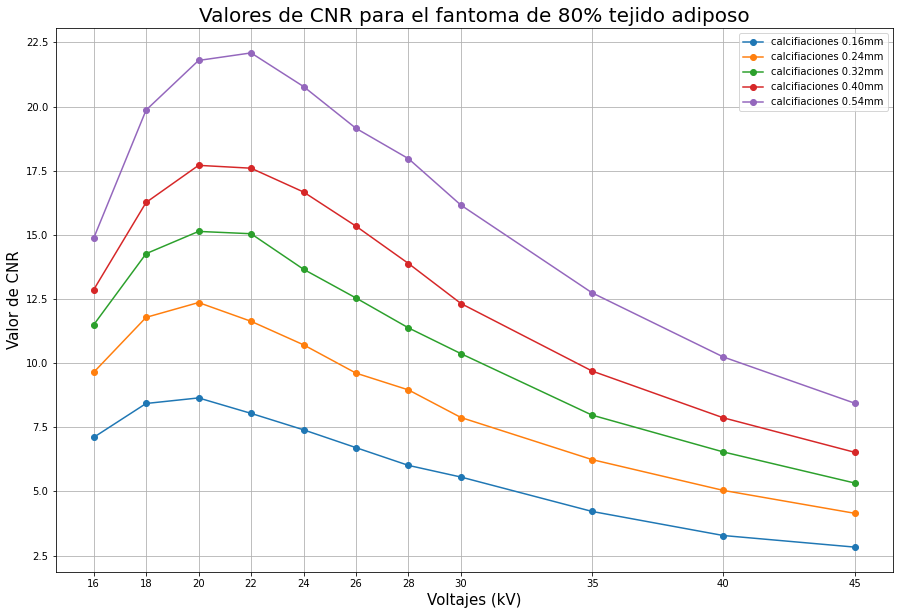

In [10]:
fig = plt.figure(figsize=(15,10))
plt.plot(VoltajesCorre,CNR1s, 'o-', label='calcifiaciones 0.16mm')
plt.plot(VoltajesCorre,CNR2s, 'o-', label='calcifiaciones 0.24mm')
plt.plot(VoltajesCorre,CNR3s, 'o-', label='calcifiaciones 0.32mm')
plt.plot(VoltajesCorre,CNR4s, 'o-', label='calcifiaciones 0.40mm')
plt.plot(VoltajesCorre,CNR5s, 'o-', label='calcifiaciones 0.54mm')
#plt.plot(VoltajesCorre,CNRGene,'*-', label='General')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
#plt.yticks([0,3,4,5,6,7,10,11], [3,4,5,6,7,10,11])
plt.title('Valores de CNR para el fantoma de 80% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()
plt.savefig('CNRs80.png')

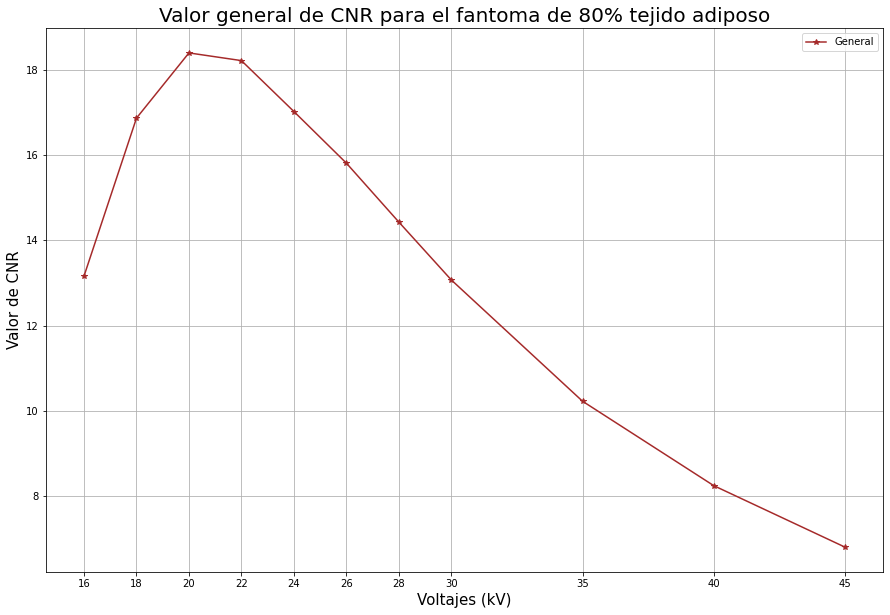

In [11]:
fig = plt.figure(figsize=(15,10))
plt.plot(VoltajesCorre,CNRGene,'*-', color='brown', label='General')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
#plt.yticks([0,3,4,5,6,7,10,11], [3,4,5,6,7,10,11])
plt.title('Valor general de CNR para el fantoma de 80% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()
plt.savefig('CNRGeneral80.png')

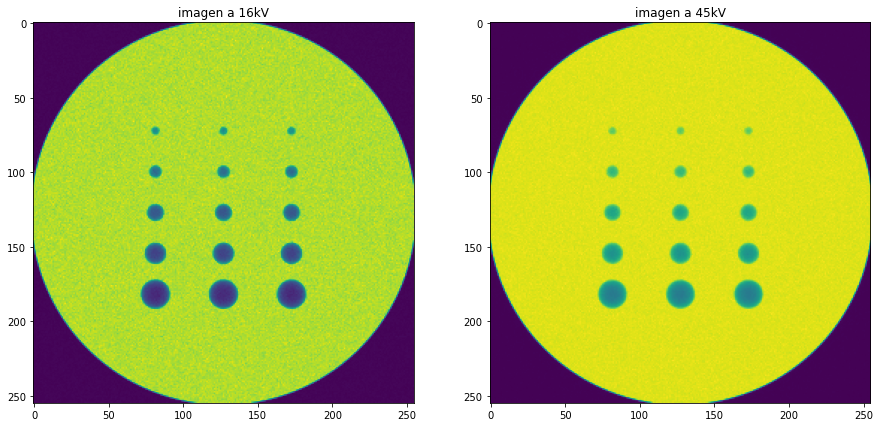

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0]
ct_scans2 = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-3-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis2 = ct_scans2[0]

ax[0].imshow(imagen_GATE_dosis,cmap='viridis')
ax[0].title.set_text('imagen a 16kV')
ax[1].imshow(imagen_GATE_dosis2,cmap='viridis')
ax[1].title.set_text('imagen a 45kV')
plt.savefig('comparación.png')